In [95]:
arr = ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'P', 'P', 'P', 
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 
        'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 
        'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 
        'A', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'M', 'M', 'M', 'M', 'M', 
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 
        'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 
        'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 
        'A', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'M', 'M', 'M', 
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 
        'M', 'M', 'M', 'M', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 
        'P', 'P']
index_list = ['P', 'M', 'A']
index_dict_list = {}
for index in index_list:
    index_dict_list[index] = []
for indx_arr in xrange(len(arr)):
    index_dict_list[arr[indx_arr]].append(indx_arr)


In [96]:
import os
import cPickle
import numpy as np

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

In [101]:
big_dict = {}

In [98]:
def load_or_take_orig(big_dict, save_file_path_1):
    if save_file_path_1 not in big_dict:
        fin     = open(save_file_path_1, 'r')
        big_dict[save_file_path_1]   = cPickle.load(fin)
        fin.close()
            
    return(big_dict[save_file_path_1])

def load_or_take_with_index(big_dict, file_now):
    
    now_dict = {}
    all_result = load_or_take_orig(big_dict, file_now)
    for index in index_list:
        tmp_result_list = []
        now_indx_list = index_dict_list[index]
        for rep_indx in all_result:
            now_tmp_result = all_result[rep_indx]
            now_part_result = now_tmp_result[now_indx_list]
            tmp_result_list.append(np.median(now_part_result))
        now_dict[index] = np.mean(tmp_result_list)
    return(now_dict)

In [15]:
path_prefix = "/home/chengxuz/barrel/barrel_github/normal_pretrained/fitting_cache/"
file_prefix = "cache_regress_layer_"
file_suffix = ".pkl"

In [16]:
layer_test = "1.1"
res_dict_test = load_or_take_with_index(big_dict, os.path.join(path_prefix, "%s%s%s" %(file_prefix, layer_test, file_suffix)))
res_dict_test

{'A': 0.29793527874804754, 'M': 0.27392519267491727, 'P': 0.27095705004130949}

In [22]:
#layer_list = ["1.1", "1.2", "1.3", "2.1", "2.2", "2.3", "2.4", "2.5", "2.6", "3.1", "3.2", "3.3", "3.4", "3.5"]
layer_list = ["1.1", "1.2", "1.3", "2.1", "2.2", "2.3", "2.4", "3.1", "3.2", "3.3", "3.4", "3.5"]

In [99]:
def print_result_with_indx(layer_list, no_double_list=["1.1", "1.2", "1.3", "2.1", "3.1"], 
                           indx_wanted="A", path_prefix="/home/chengxuz/barrel/barrel_github/normal_pretrained/fitting_cache/",
                           file_prefix = "cache_regress_layer_", file_suffix = ".pkl", 
                           with_plot = False, which_net = "depths", title_prefix = "Alexnet "):
    res_list = []
    for layer_now in layer_list:
        if layer_now in no_double_list:
            file_name = os.path.join(path_prefix, "%s%s%s" % (file_prefix, layer_now, file_suffix))
        else:
            file_name = os.path.join(path_prefix, "%s%s_%s%s" % (file_prefix, layer_now, which_net, file_suffix))
        now_dict = load_or_take_with_index(big_dict, file_name)
        res_list.append(now_dict[indx_wanted])
    if not with_plot:
        print(res_list)
    else:
        plt.figure()
        plt.plot(res_list)
        plt.gcf().set_size_inches(7.5, 4.5)
        label_fontsize = 15
        title_fontsize = 18
        ticks_fontsize = 12
        plt.xlabel('Layer number', fontsize=label_fontsize)
        plt.ylabel('Neural fitting', fontsize=label_fontsize)
        plt.title('%sNormal net fitting group %s' % (title_prefix, indx_wanted), fontsize=title_fontsize)
        pylab.xticks(fontsize=ticks_fontsize)
        pylab.yticks(fontsize=ticks_fontsize)
    
    
    

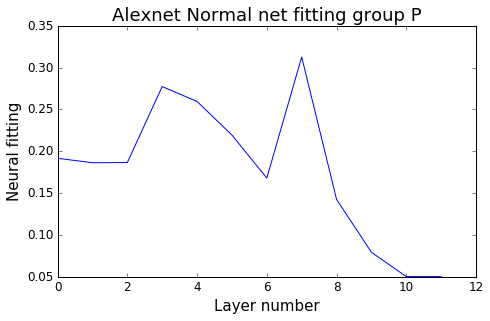

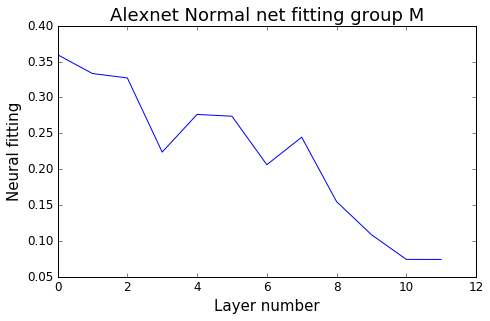

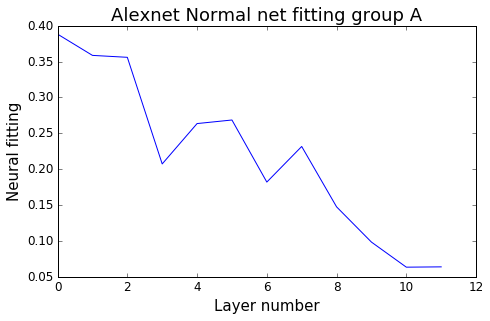

In [44]:
print_result_with_indx(layer_list, indx_wanted="P", with_plot=True)
print_result_with_indx(layer_list, indx_wanted="M", with_plot=True)
print_result_with_indx(layer_list, indx_wanted="A", with_plot=True)

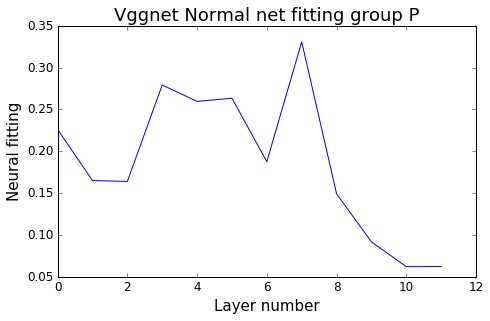

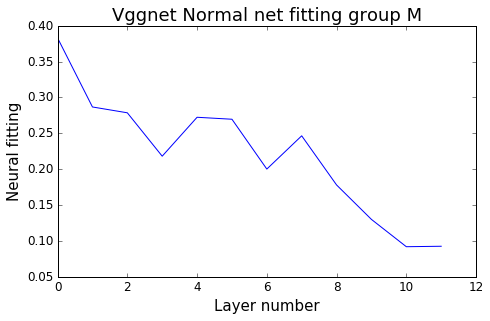

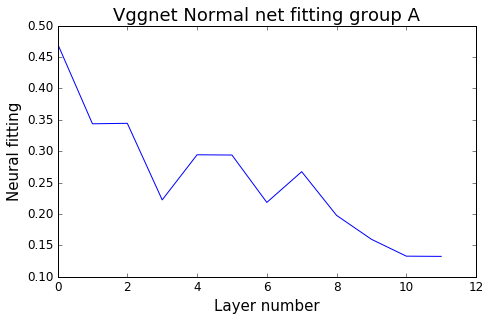

In [45]:
print_result_with_indx(layer_list, indx_wanted="P", with_plot=True,no_double_list=["1.1", "1.2", "1.3", "2.1"],
                       file_prefix = "cache_regress_vgg_layer_", title_prefix="Vggnet ")
print_result_with_indx(layer_list, indx_wanted="M", with_plot=True,no_double_list=["1.1", "1.2", "1.3", "2.1"],
                       file_prefix = "cache_regress_vgg_layer_", title_prefix="Vggnet ")
print_result_with_indx(layer_list, indx_wanted="A", with_plot=True,no_double_list=["1.1", "1.2", "1.3", "2.1"],
                       file_prefix = "cache_regress_vgg_layer_", title_prefix="Vggnet ")

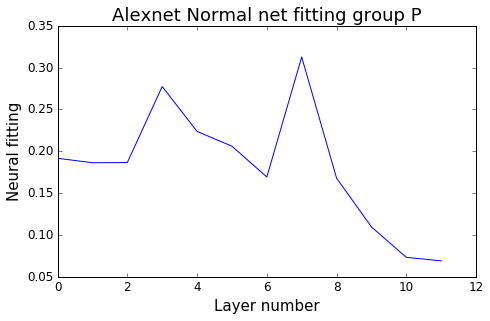

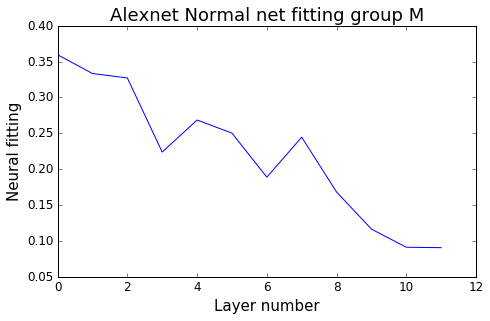

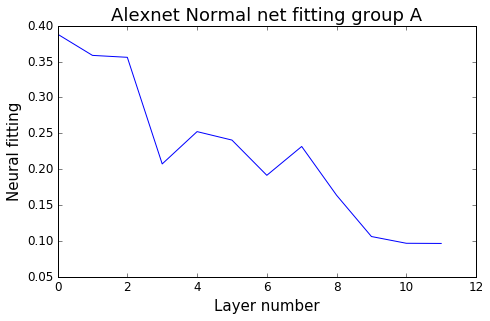

In [46]:
print_result_with_indx(layer_list, indx_wanted="P", with_plot=True, which_net = "normals")
print_result_with_indx(layer_list, indx_wanted="M", with_plot=True, which_net = "normals")
print_result_with_indx(layer_list, indx_wanted="A", with_plot=True, which_net = "normals")

In [93]:
layer_list_short = ["1.1", "1.2", "1.3", "2.1", "2.2", "2.3", "2.4"]

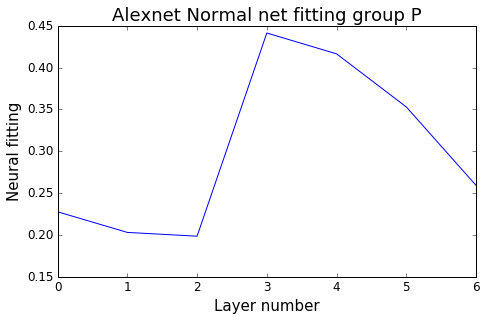

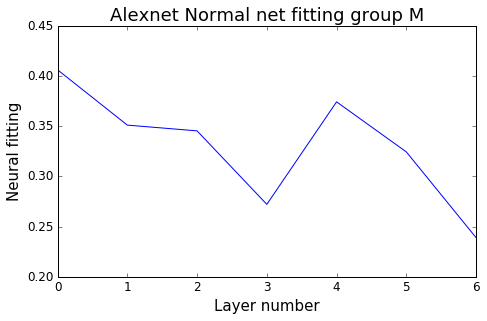

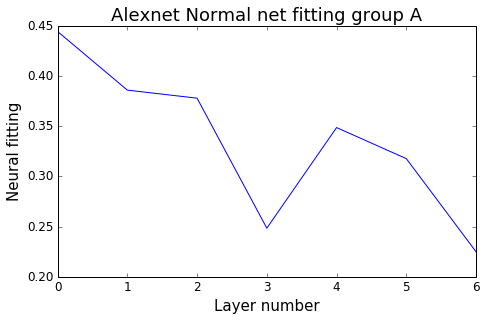

In [103]:
for indx_wanted in ['P', 'M', 'A']:
    print_result_with_indx(layer_list_short, indx_wanted=indx_wanted, with_plot=True, which_net = "normals",
                           file_prefix = "cache_PCA_regress_layer_")

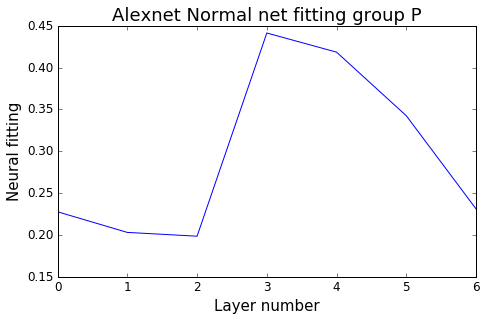

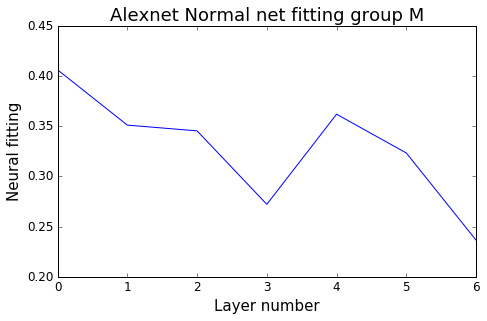

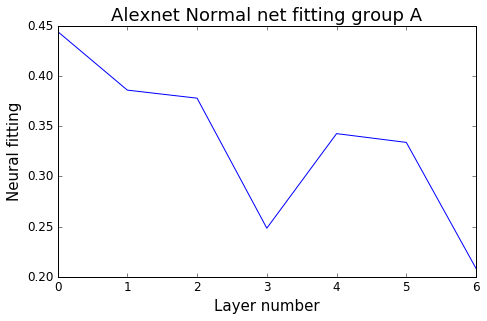

In [104]:
for indx_wanted in ['P', 'M', 'A']:
    print_result_with_indx(layer_list_short, indx_wanted=indx_wanted, with_plot=True,
                           file_prefix = "cache_PCA_regress_layer_")

# Using New Projection method

In [92]:
imagenet_datapath = '/mnt/data/imagenet2012.hdf5'

# Generating hvm_alike dataset

In [1]:
import scipy.misc
from dldata.stimulus_sets.hvm_alike import HvMGenerator

d = HvMGenerator()
d.fetch(download_resources=True)  # Run this the first time only to get all the assets

Can't import separate mcc package
Can't import asgd.


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-pac

textures_$folder$
textures/lake3.jpg
textures/flicker_material_database_$folder$
textures/flicker_material_database/mask_$folder$
textures/flicker_material_database/mask/wood_$folder$
textures/flicker_material_database/mask/wood/wood_object_050_new.jpg
textures/flicker_material_database/mask/wood/wood_object_049_new.jpg
textures/flicker_material_database/mask/wood/wood_object_048_new.jpg
textures/flicker_material_database/mask/wood/wood_object_047_new.jpg
textures/flicker_material_database/mask/wood/wood_object_046_new.jpg
textures/flicker_material_database/mask/wood/wood_object_045_new.jpg
textures/flicker_material_database/mask/wood/wood_object_044_new.jpg
textures/flicker_material_database/mask/wood/wood_object_043_new.jpg
textures/flicker_material_database/mask/wood/wood_object_042_new.jpg
textures/flicker_material_database/mask/wood/wood_object_041_new.jpg
textures/flicker_material_database/mask/wood/wood_object_040_new.jpg
textures/flicker_material_database/mask/wood/wood_object_

In [6]:
import sys
sys.path

['',
 '/home/chengxuz/.local/lib/python2.7/site-packages/tfutils-0.1.dev1-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/yamutils-dev-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/nose-1.3.7-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/tabular-0.1-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/future-0.16.0-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/skdata-0.0.4-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/bangmetric-0.0.1-py2.7.egg',
 '/usr/lib/x86_64-linux-gnu/panda3d',
 '/usr/share/panda3d',
 '/home/feigelis/genthor',
 '/home/chengxuz/python_lib/lib/python2.7/site-packages',
 '/home/yamins/caffe/python',
 '/home/chengxuz/barrel/barrel_github/barrel/ipython_note_anlys',
 '/home/chengxuz/python_lib/lib/python2.7/site-packages/yamutils-dev-py2.7.egg',
 '/home/chengxuz/python_lib/lib/python2.7/site-packages/nose-1.3.7-py2.7.egg',
 '/home/chengxuz/python_lib/lib/python2.7/site-packages/tfutils-0.1.dev1-py2.7.egg',
 '/home/chengxuz/python_lib/l

In [3]:
im = d.sample()
#scipy.misc.toimage(im)

ValueError: a must be non-empty

In [8]:
d = HvMGenerator()
d.BCKGS

[]

In [15]:
import scipy.misc
from dldata.stimulus_sets.hvm_alike import HvMGenerator

d = HvMGenerator()
d.fetch(download_resources=True)  # Run this the first time only to get all the assets

In [27]:
import glob
import skdata
import os

d.BCKGS = glob.glob(os.path.join(skdata.data_home.get_data_home(),'genthor/resources/backgrounds/*'))


downloading alfa155_POV_geom.tar.gz
('converting to', {'/home/chengxuz/.skdata/genthor/resources/objs/alfa155_POV_geom/alfa155_POV_geom.tgz': '/home/chengxuz/.skdata/genthor/resources/eggs/alfa155_POV_geom/alfa155_POV_geom.egg'})
rm -rf /home/chengxuz/tmp/scrap_94100449_6c002fe2eb31e8b23b15fd20a44f43729b4882dd


IOError: Could not load model file(s): ['/home/chengxuz/.skdata/genthor/resources/eggs/alfa155_POV_geom/alfa155_POV_geom.egg']

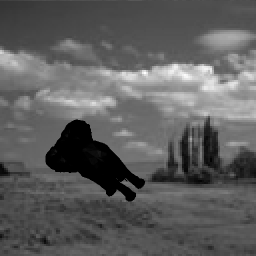

In [33]:
im = d.sample()
scipy.misc.toimage(im)

In [35]:
from collections import OrderedDict
DEFAULT_NORMALS_PREPROC = OrderedDict([('normalize', False),
                                   ('dtype', 'float32'),
                                   ('resize_to', [256, 256, 3]),
                                   ('mode', 'RGB'),
                                   ('crop', None),
                                   ('mask', None),
                                   ('shader', ['vshader_normals_absolute.glsl',                                                        
                                               'fshader_normals.glsl'])])

In [36]:
im = d.sample(preproc = DEFAULT_NORMALS_PREPROC)
scipy.misc.toimage(im)

ValueError: no field of name preproc

In [88]:
import dldata.stimulus_sets.hvm_alike as hvm_alike
reload(hvm_alike)
da = hvm_alike.HvMAlike()

In [89]:
im2 = da.get_images(preproc=DEFAULT_NORMALS_PREPROC, get_models=True)

INFO:skdata.larray:Re-using memmap /home/chengxuz/.skdata/genthor/HvMAlike_6eef6648406c333a4035cd5e60d0bf2ecf2606d7/cache/02b020dda19562420fd0264835a643146a8122a3/data.raw with dtype float32, shape (5760, 256, 256, 3)


In [90]:
im2.shape

(5760, 256, 256, 3)

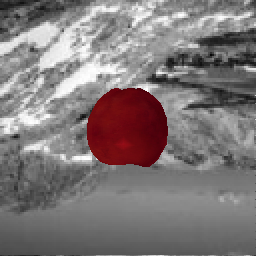

In [91]:
im2_test = np.asarray(im2[0])
scipy.misc.toimage(im2_test)

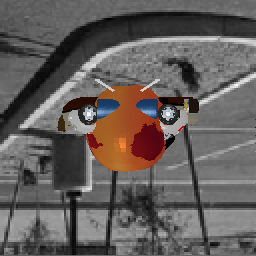

In [87]:
im2_test = np.asarray(im2[200])
scipy.misc.toimage(im2_test)